# Project - Air Quality

**Domain Name:** *Environment Air quality*<br>


---


**Abstract :**<br>


> Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.<br><br>


**Dataset :** *Air quality of an Italian city*


> Dataset - https://archive.ics.uci.edu/ml/datasets/Air+quality





# Attributes of the dataset are:


<table>
<tr>
<th>SI No</th>
<th>Attribute</th>
<th>Description</th>
</tr>
<tr>
<td>0</td>
<td>Date</td>
<td>Date(DD/MM/YYYY)</td>
</tr>
<tr>
<td>1</td>
<td>Time</td>
<td>Time (HH.MM.SS)</td>
</tr>
<tr>
<td>2</td>
<td>CO(GT)</td>
<td>True hourly averaged concentration CO in mg/m^3 (reference analyzer)</td>
</tr>
<tr>
<td>3</td>
<td>PT08.S1(CO)</td>
<td>PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)</td>
</tr>
<tr>
<td>4</td>
<td>NMHC(GT)</td>
<td>True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)</td>
</tr>
<tr>
<td>5</td>
<td>C6H6(GT)</td>
<td>True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)</td>
</tr>
<tr>
<td>6</td>
<td>PT08.S2(NMHC)</td>
<td>PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)</td>
</tr>
<tr>
<td>7</td>
<td>NOx(GT)</td>
<td>True hourly averaged NOx concentration in ppb (reference analyzer)</td>
</tr>
<tr>
<td>8</td>
<td>PT08.S3(NOx)</td>
<td>PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)</td>
</tr>
<tr>
<td>9</td>
<td>NO2(GT)</td>
<td>True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)</td>
</tr>
<tr>
<td>10</td>
<td>PT08.S4(NO2)</td>
<td>PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)</td>
</tr>
<tr>
<td>11</td>
<td>PT08.S5(O3)</td>
<td>PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)</td>
</tr>
<tr>
<td>12</td>
<td>T</td>
<td>Temperature in Â°C</td>
</tr>
<tr>
<td>13</td>
<td>RH</td>
<td>Relative Humidity (%)</td>
</tr>
<tr>
<td>14</td>
<td>AH</td>
<td>AH Absolute Humidity</td>
</tr>

</table>


# The problem -


> Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. For example, if the air temperature e is 75 degrees Fahrenheit (24 degrees Celsius) and the relative humidity is zero percent, the air temperature feels like 69 degrees Fahrenheit (21 C) to our bodies. If the air temperature is 75 degrees Fahrenheit (24 C) and the relative humidity is 100 percent, we feel like it's 80 degrees (27 C) out.



### Objective :<br>
> So we will predict the Relative Humidity of a given point of time based on the all other attributes affecting the change in RH.


In [ ]:
#Importing the Libraries for the Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
#Reading the AirQualityUCI dataset and assigning the Date Column as a index for the further Process.

In [22]:
df = pd.read_csv("../Downloads/AirQuality.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


# EDA

In [23]:
df.shape

(9357, 14)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 to 2005-04-04
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   int64  
 3   NMHC(GT)       9357 non-null   int64  
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   int64  
 6   NOx(GT)        9357 non-null   int64  
 7   PT08.S3(NOx)   9357 non-null   int64  
 8   NO2(GT)        9357 non-null   int64  
 9   PT08.S4(NO2)   9357 non-null   int64  
 10  PT08.S5(O3)    9357 non-null   int64  
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(1)
memory usage: 1.1+ MB


##### Checking if there are any missing values are present in the dataset.

In [25]:
df.isna().sum()

Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

##### From above calculation we found out that there are no missing values are in the dataset.

### Outliers

##### Now checking if there are any outliers are present in the given dataset.

<AxesSubplot:>

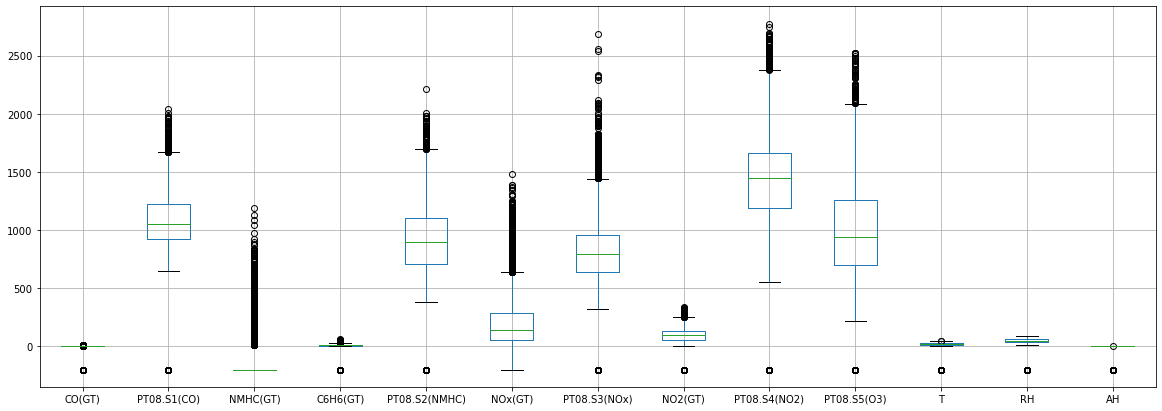

In [26]:
fig = plt.figure(figsize=(20,7))
df.boxplot()

#### In the above plot the black circles represents the outliers. We have to remove those in order to get correct assumptions.
#### There are 2 methods to remove the outliers
####   1. We can use IQR Method
####   2. We can use Clipping Method

### 1. IQR Method For Outliers

In [27]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

CO(GT)             2.0000
PT08.S1(CO)      300.0000
NMHC(GT)           0.0000
C6H6(GT)           9.6000
PT08.S2(NMHC)    394.0000
NOx(GT)          234.0000
PT08.S3(NOx)     323.0000
NO2(GT)           80.0000
PT08.S4(NO2)     477.0000
PT08.S5(O3)      555.0000
T                 13.2000
RH                27.8000
AH                 0.6039
dtype: float64

In [28]:
o_df=df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
o_df.shape

<ipython-input-28-d62f6ee2fb65>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  o_df=df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
<ipython-input-28-d62f6ee2fb65>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  o_df=df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]


(5462, 14)

##### After seeing the above result we lost 50% of data and that's to much data loss. So we can't use the IQR Method to remove outliers

<AxesSubplot:>

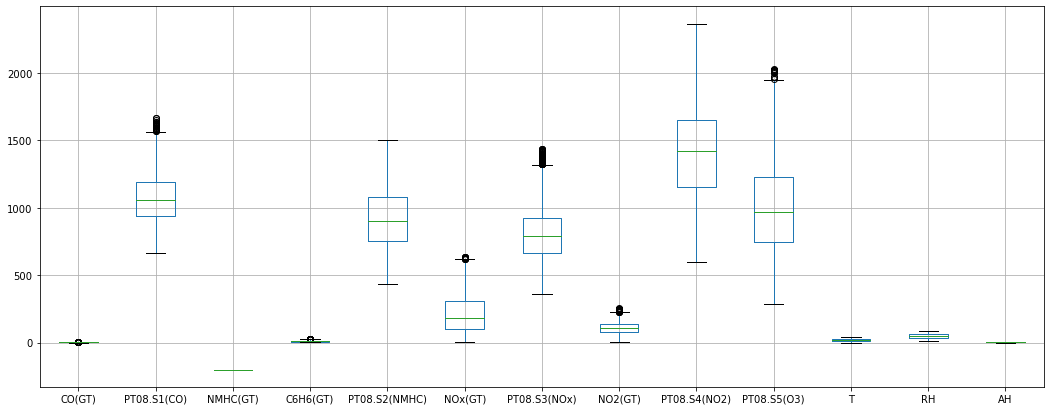

In [29]:
fig = plt.figure(figsize=(18,7))
o_df.boxplot()

##### After using IQR Method there are still presence of outliers in the data.
#### So we will try Clipping 

### Clipping Method for Outliers

In [30]:
def outliersClipping(df,lower,upper):
  for col in df.columns:
    Lower = df[col].quantile(lower)
    Upper = df[col].quantile(upper)
    df[col] = df[col].clip(Lower,Upper)
  return df

In [31]:
df = df.drop(columns=["Time"])

In [32]:
df = outliersClipping(df,0.1,0.9)

<AxesSubplot:>

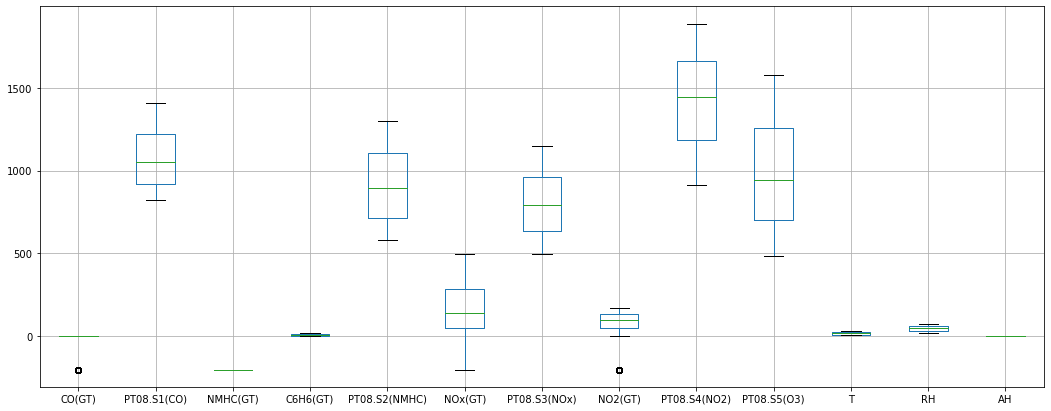

In [33]:
fig = plt.figure(figsize=(18,7))
df.boxplot()

##### By using Clipping We removed most of the outliers.
##### Now we can apply futher Processing on the dataset.

In [34]:
plt.rcParams["figure.figsize"] = (14, 12)

array([[<AxesSubplot:title={'center':'CO(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S1(CO)'}>,
        <AxesSubplot:title={'center':'NMHC(GT)'}>,
        <AxesSubplot:title={'center':'C6H6(GT)'}>],
       [<AxesSubplot:title={'center':'PT08.S2(NMHC)'}>,
        <AxesSubplot:title={'center':'NOx(GT)'}>,
        <AxesSubplot:title={'center':'PT08.S3(NOx)'}>,
        <AxesSubplot:title={'center':'NO2(GT)'}>],
       [<AxesSubplot:title={'center':'PT08.S4(NO2)'}>,
        <AxesSubplot:title={'center':'PT08.S5(O3)'}>,
        <AxesSubplot:title={'center':'T'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'AH'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

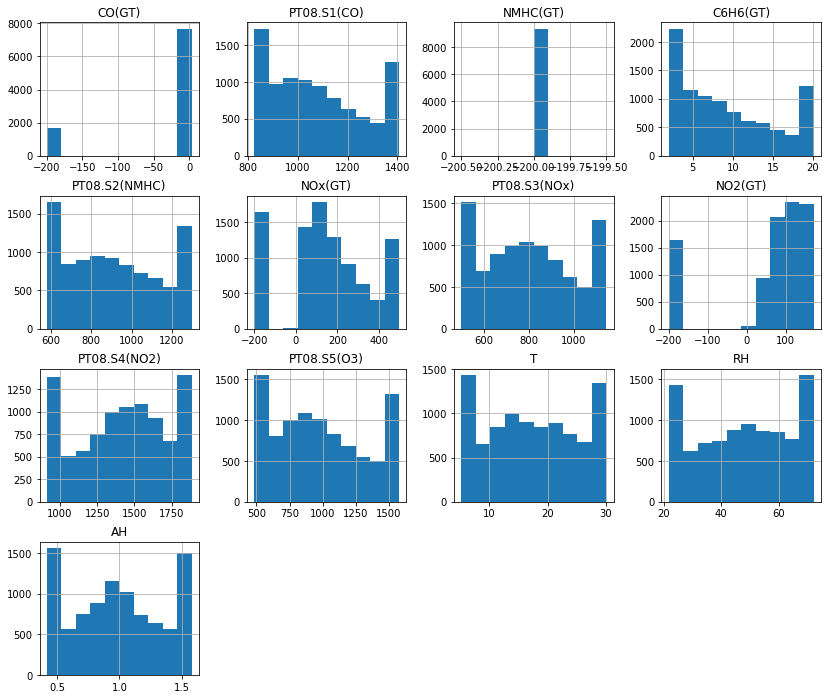

In [35]:
df.hist()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

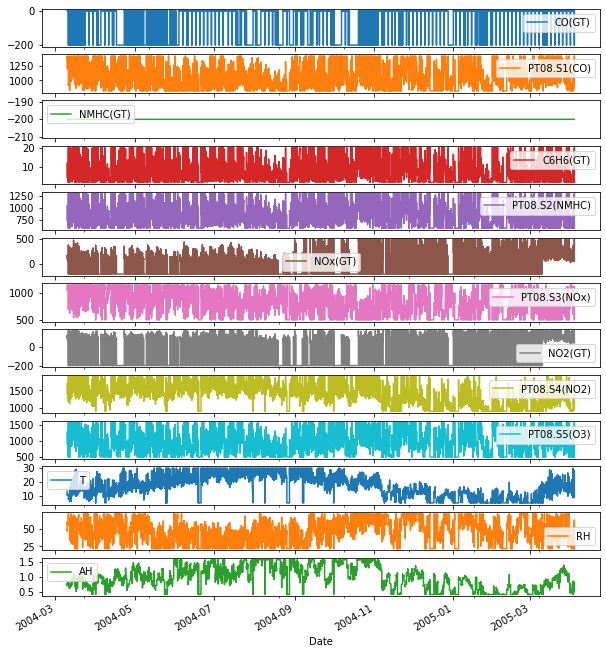

In [36]:
df.plot(subplots=True,figsize=(10,12))

# Linear Regression modeling

#### In order to find independent column we need to do some analysis

In [37]:
df.corr().head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.098537,NaN,0.063567,0.063609,0.590881,-0.096541,0.677851,-0.076934,0.099754,-0.142739,-0.037190,-0.193867
PT08.S1(CO),0.098537,1.000000,NaN,0.893464,0.896403,0.464446,-0.685387,0.268700,0.672437,0.906566,0.146046,0.180287,0.212657
NMHC(GT),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C6H6(GT),0.063567,0.893464,NaN,1.000000,0.991545,0.443541,-0.689207,0.245340,0.753244,0.882282,0.298056,-0.011531,0.243876
PT08.S2(NMHC),0.063609,0.896403,NaN,0.991545,1.000000,0.435188,-0.684771,0.247869,0.764114,0.886701,0.329243,-0.013818,0.263713


<AxesSubplot:>

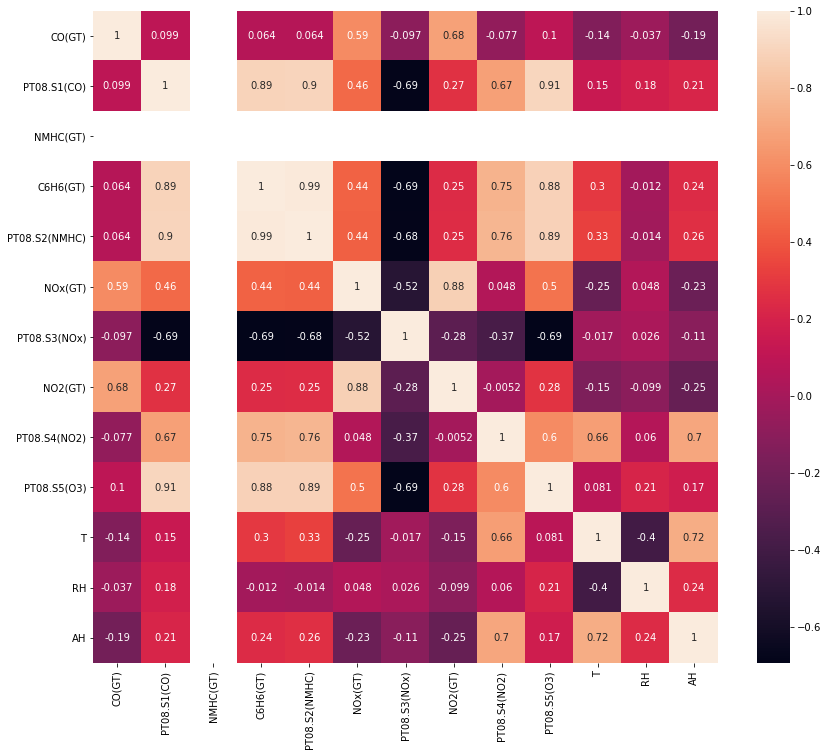

In [38]:
sns.heatmap(df.corr(),annot=True)

In [39]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

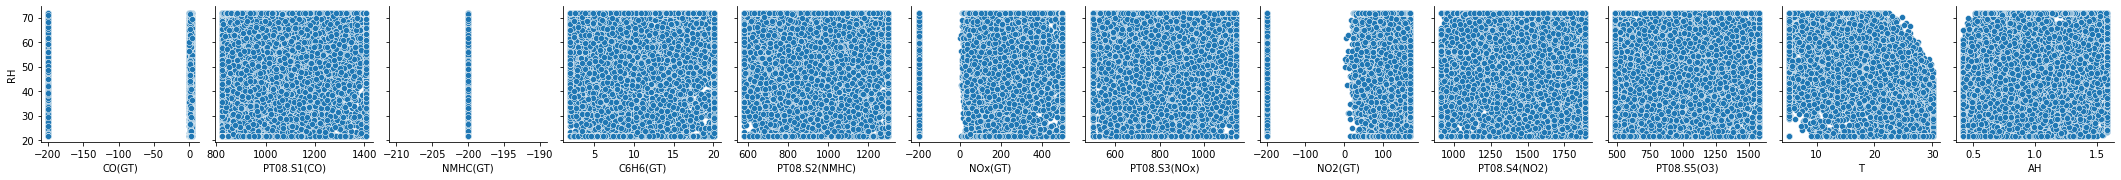

In [40]:
sns.pairplot(x_vars=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'AH'],y_vars=["RH"],data=df)

In [41]:
x = df.drop(columns=["RH","CO(GT)","NMHC(GT)"])
y = df["RH"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [44]:
xtrain.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
Date,,,,,,,,,,
2005-03-11,928,2.7,631,148.0,985,89,912,884,5.2,0.48000
2004-08-07,929,6.0,811,57.0,862,67,1541,642,30.1,1.57898
2004-07-21,1239,14.4,1129,121.0,637,106,1839,1308,28.9,1.53700
2004-07-06,913,4.6,743,65.0,931,66,1540,884,21.8,1.35390
2005-03-22,1069,5.7,799,181.0,682,121,1211,1044,12.6,0.98860


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linear = LinearRegression()
linear.fit(xtrain,ytrain)

LinearRegression()

In [48]:
yPred = linear.predict(xtest)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [50]:
MSE = mean_squared_error(ytest,yPred)
MSE

37.131418889031536

In [51]:
MAE = mean_absolute_error(ytest,yPred)
MAE

4.700201513991881

In [52]:
score = r2_score(ytest,yPred)
score

0.8644560376817584

In [53]:
output = pd.DataFrame({"Actual" : ytest,"Predicted" : yPred})
output

,Actual,Predicted
Date,,
2004-04-26,31.7,33.260188
2005-02-08,43.6,49.328642
2004-08-16,45.6,45.919457
2004-09-18,46.7,45.686782
2004-04-04,66.5,66.680807
...,...,...
2004-08-31,60.8,60.259025
2005-03-26,57.5,58.222564
2004-04-05,63.3,61.576974


<AxesSubplot:xlabel='Date'>

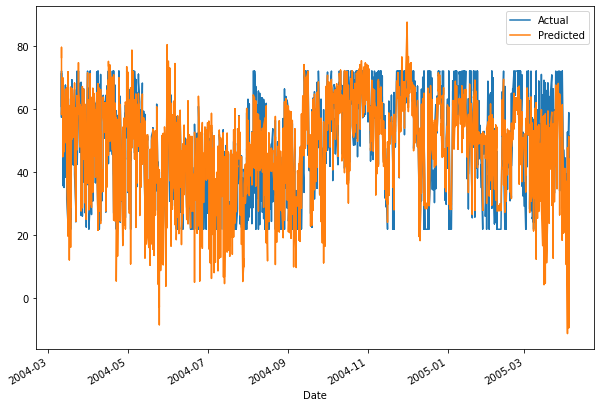

In [54]:
output.plot(figsize=(10,7))

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scalerdf = scaler.fit_transform(df)
scalerdf = pd.DataFrame(scalerdf,columns=df.columns)
scalerdf

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.993624,0.919383,0.0,0.546961,0.647632,0.524806,0.859784,0.843666,0.800821,0.717550,0.337349,0.538767,0.291206
1,0.990682,0.802744,0.0,0.408840,0.520891,0.434471,1.000000,0.787062,0.664271,0.446984,0.325301,0.514911,0.263327
2,0.991663,0.991424,0.0,0.386740,0.498607,0.474620,0.989214,0.846361,0.660164,0.540219,0.269076,0.640159,0.284646
3,0.991663,0.946827,0.0,0.397790,0.511142,0.533410,0.915254,0.867925,0.689938,0.658135,0.232932,0.759443,0.316151
4,0.988720,0.768439,0.0,0.248619,0.355153,0.474620,1.000000,0.851752,0.593429,0.573126,0.240964,0.751491,0.317964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.996077,0.840480,0.0,0.635359,0.724234,0.963579,0.063174,1.000000,0.474333,1.000000,0.670683,0.149105,0.290343
9353,0.992643,0.581475,0.0,0.519337,0.621170,0.792945,0.163328,1.000000,0.361396,0.718464,0.767068,0.037773,0.251588
9354,0.992643,0.545455,0.0,0.574586,0.671309,0.706911,0.161787,1.000000,0.337782,0.556673,0.871486,0.000000,0.190046
9355,0.991172,0.307033,0.0,0.414365,0.529248,0.623745,0.314330,0.959569,0.132444,0.262340,0.927711,0.000000,0.080686


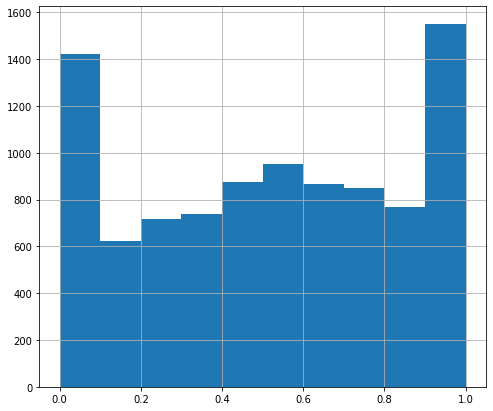

In [ ]:
plt.figure(figsize=(8,7))
scalerdf["RH"].hist()

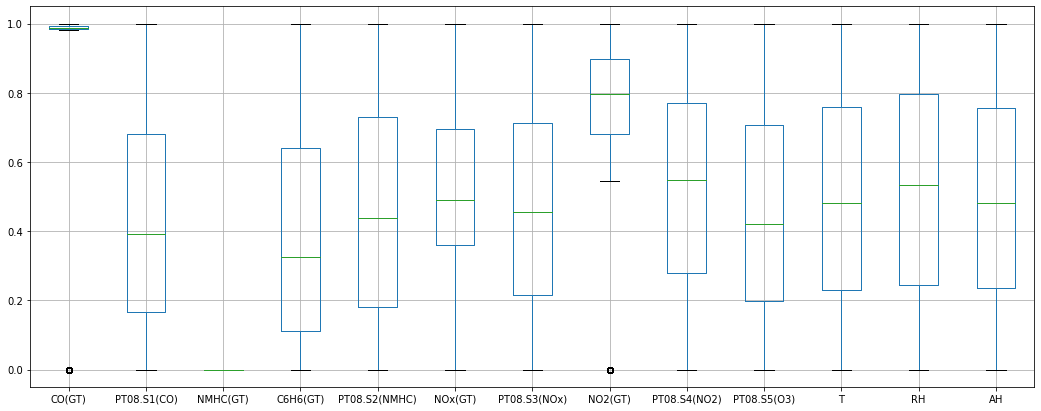

In [ ]:
scalerdf.boxplot(figsize=(18,7))

In [ ]:
scalerdf.mean()

CO(GT)           0.812528
PT08.S1(CO)      0.437345
NMHC(GT)         0.000000
C6H6(GT)         0.398529
PT08.S2(NMHC)    0.463436
NOx(GT)          0.498894
PT08.S3(NOx)     0.472213
NO2(GT)          0.687275
PT08.S4(NO2)     0.522720
PT08.S5(O3)      0.457710
T                0.491772
RH               0.517446
AH               0.490836
dtype: float64

In [ ]:
scalerdf.std()

CO(GT)           0.380566
PT08.S1(CO)      0.322109
NMHC(GT)         0.000000
C6H6(GT)         0.328477
PT08.S2(NMHC)    0.325652
NOx(GT)          0.303017
PT08.S3(NOx)     0.317553
NO2(GT)          0.332394
PT08.S4(NO2)     0.316414
PT08.S5(O3)      0.319909
T                0.321224
RH               0.326678
AH               0.323399
dtype: float64

# Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV

In [ ]:
#Ridge Model
ridge = Ridge(alpha=0.1)
ridge.fit(xtrain,ytrain)
print("Ridge Coefficients :",ridge.coef_)

Ridge Coefficients : [ 1.88473841e-02 -2.02565654e+00  5.34584155e-02  8.11495513e-03
  3.53124546e-02 -1.33630934e-02 -9.31177903e-04  9.28055139e-03
 -2.55019239e+00  4.83409033e+01]


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
mse = mean_squared_error()
mse

ValueError: y_true and y_pred have different number of output (10!=1)

In [ ]:
#Lasso Model
lasso = Lasso(alpha=0.1)
lasso.fit(xtrain,ytrain)
print("Lasso Coefficients :",lasso.coef_)

Lasso Coefficients : [ 1.87110107e-02 -1.95181322e+00  4.53377493e-02  1.10252905e-02
  3.41898029e-02 -1.80263520e-02  3.11413399e-03  1.05156553e-02
 -2.46716405e+00  4.48130838e+01]


In [ ]:
alpha=[0.0001,0.001,0.01,0.1,0.3,0.5,1,10]

In [ ]:
#ElasticNetCV Model
elastic = ElasticNetCV(alphas=alpha,cv=5)
elastic.fit(xtrain,ytrain)
print("Elastic Coefficients :",elastic.coef_)

Elastic Coefficients : [ 1.88431768e-02 -2.02764873e+00  5.33985636e-02  8.17181795e-03
  3.52919513e-02 -1.34535193e-02 -8.54795034e-04  9.29978090e-03
 -2.54891430e+00  4.82784766e+01]


## Result on Training and Testing Dataset

In [ ]:
print('Linear Regression on training data   :',np.float16(linear.score(xtrain,ytrain)))
print('Linear Regression on testing data    :',np.float16(linear.score(xtest,ytest)))
print('Ridge Regression on training data    :',np.float16(ridge.score(xtrain,ytrain)))
print('Rigde Regression on testing data     :',np.float16(ridge.score(xtest,ytest)))
print('Lasso Regression on training data    :',np.float16(lasso.score(xtrain,ytrain)))
print('Lasso Regression on testing data     :',np.float16(lasso.score(xtest,ytest)))
print('Elastic Regression on training data  :',np.float16(elastic.score(xtrain,ytrain)))
print('Elastic Regression on testing data   :',np.float16(elastic.score(xtest,ytest)))

Linear Regression on training data   : 0.8643
Linear Regression on testing data    : 0.8643
Ridge Regression on training data    : 0.8643
Rigde Regression on testing data     : 0.8643
Lasso Regression on training data    : 0.8633
Lasso Regression on testing data     : 0.864
Elastic Regression on training data  : 0.8643
Elastic Regression on testing data   : 0.8643


# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree = 4)
poly_xtrain = pf.fit_transform(xtrain)
poly_xtest = pf.fit_transform(xtest)

In [ ]:
#Linear Model
linear=LinearRegression()
linear.fit(poly_xtrain,ytrain)
print("LR Coefficients:",linear.coef_)

LR Coefficients: [-2.20801916e-06  1.17155535e+00 -5.56957012e-02 ... -6.87155474e-01
  6.12939525e+00 -1.52582899e+00]


In [ ]:
#Ridge Model 
ridge=Ridge(alpha=0.1)
ridge.fit(poly_xtrain,ytrain)
print("Ridge Coefficients:",ridge.coef_)

Ridge Coefficients: [ 0.00000000e+00  1.42460074e+00 -2.57963049e-03 ... -6.25774387e-01
  5.54299778e+00  2.09583450e+00]


In [ ]:
#Lasso Model
lasso=Lasso(alpha=0.1)
lasso.fit(poly_xtrain,ytrain)
print("Lasso Coefficients:",lasso.coef_)

Lasso Coefficients: [0.         0.02647439 0.         ... 0.0052467  0.14503037 0.        ]


In [ ]:
#ElasticNetCV Model
warnings.filterwarnings("ignore")
elastic = ElasticNetCV(alphas=alpha,cv=5)
elastic.fit(poly_xtrain,ytrain)
print("Elastic Coefficients :",elastic.coef_)

Elastic Coefficients : [ 0.          0.02590597 -0.         ...  0.00477473  0.17245032
  0.        ]


### Result on training and testing dataset

In [ ]:
print('Linear Regression on training data   :',np.float16(linear.score(poly_xtrain,ytrain)))
print('Linear Regression on testing data    :',np.float16(linear.score(poly_xtest,ytest)))
print('Ridge Regression on training data    :',np.float16(ridge.score(poly_xtrain,ytrain)))
print('Rigde Regression on testing data     :',np.float16(ridge.score(poly_xtest,ytest)))
print('Lasso Regression on training data    :',np.float16(lasso.score(poly_xtrain,ytrain)))
print('Lasso Regression on testing data     :',np.float16(lasso.score(poly_xtest,ytest)))
print('Elastic Regression on training data  :',np.float16(elastic.score(poly_xtrain,ytrain)))
print('Elastic Regression on testing data   :',np.float16(elastic.score(poly_xtest,ytest)))

Linear Regression on training data   : 0.987
Linear Regression on testing data    : 0.8022
Ridge Regression on training data    : 0.9873
Rigde Regression on testing data     : 0.8486
Lasso Regression on training data    : 0.976
Lasso Regression on testing data     : 0.9736
Elastic Regression on training data  : 0.976
Elastic Regression on testing data   : 0.9736
